In [31]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [32]:
#import libraries
import glob
from datetime import datetime, date
from pandas.core import datetools
from pandas import Series
import pandas.tseries

In [33]:
#import datasets
path = '/Users/paulraymond/Downloads/nyt-comments/Articles'
all_files = glob.glob(path + "/*")

files = []

for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header=0)
    files.append(df)
    
articles = pd.concat(files, axis=0, ignore_index=True)
articles.head()

/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,NaN,58927e0495d0e0392607e1b3,1129,By KEN BELSON,article,N.F.L. vs. Politics Has Been Battle All Season...,"['Football', 'Super Bowl', 'National Football ...",1,Sports,12,2017-02-02 00:26:16,Pro Football,Despite the national tumult over immigration s...,The New York Times,News,https://www.nytimes.com/2017/02/01/sports/supe...
1,NaN,5893033d95d0e0392607e2d6,3082,By UNKNOWN,article,Voice. Vice. Veracity.,"['Television', 'Home Box Office', 'Girls (TV P...",1,Arts&Leisure,1,2017-02-02 10:00:24,Television,Our critics look at the impact of the HBO show...,The New York Times,News,https://www.nytimes.com/2017/02/02/arts/televi...
2,NaN,5893039595d0e0392607e2da,693,By MANOHLA DARGIS,article,A Stand-Up’s Downward Slide,"['Movies', 'The Comedian (Movie)', 'De Niro, R...",1,Weekend,5,2017-02-02 10:01:53,Unknown,Joined by a cast that includes Edie Falco and ...,The New York Times,Review,https://www.nytimes.com/2017/02/02/movies/the-...
3,NaN,5893109995d0e0392607e2ef,1049,By ALEXANDRA S. LEVINE,article,New York Today: A Groundhog Has Her Day,"['New York City', 'Groundhogs']",1,Metro,0,2017-02-02 10:57:25,Unknown,Thursday: A meet-and-greet with Staten Island ...,The New York Times,briefing,https://www.nytimes.com/2017/02/02/nyregion/ne...
4,NaN,5893114495d0e0392607e2f1,1283,By BONNIE TSUI,article,A Swimmer’s Communion With the Ocean,"['Travel and Vacations', 'Swimming', 'Oceans a...",1,Travel,4,2017-02-02 11:00:03,Unknown,"“We swam in that heaving body of aquamarine, a...",The New York Times,News,https://www.nytimes.com/2017/02/02/travel/hawa...


In [34]:
#import datasets
path = '/Users/paulraymond/Downloads/nyt-comments/Comments'
all_files = glob.glob(path + "/*")

files = []

for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header=0)
    files.append(df)
    
comments = pd.concat(files, axis=0, ignore_index=True)
comments.head()

/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14,15,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14,15,31,32) have mixed ty

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,1517529462,5a7258e410f40f00018bed7d,835.0,The snake-filled heads comment made me think o...,25791250.0,25791250.0,<br/>,comment,1.517508e+09,1.0,...,approved,1.0,0.0,Op-Ed,1517529462,Jennie,79172841.0,WA,NaN,NaN
1,1517529428,5a7258e410f40f00018bed7d,835.0,She-devil reporting for duty!,25795675.0,25795675.0,<br/>,comment,1.517527e+09,1.0,...,approved,1.0,0.0,Op-Ed,1517529428,Nice White Lady,66376882.0,Seattle,NaN,NaN
2,1517529427,5a7258e410f40f00018bed7d,835.0,XX is the new mark of the devil.,25792078.0,25792078.0,<br/>,comment,1.517511e+09,1.0,...,approved,1.0,0.0,Op-Ed,1517529427,Stan Sutton,27924638.0,"Westchester County, NY",NaN,NaN
3,1517529425,5a7258e410f40f00018bed7d,835.0,"""Courtland Sykes"" should be writing for The On...",25791604.0,25791604.0,<br/>,comment,1.517510e+09,1.0,...,approved,1.0,0.0,Op-Ed,1517529425,Phil Carson,31909107.0,Denver,NaN,NaN
4,1517529418,5a7258e410f40f00018bed7d,835.0,"I happen to descend for a few of them, because...",25795241.0,25795241.0,<br/>,comment,1.517525e+09,1.0,...,approved,1.0,0.0,Op-Ed,1517529418,Abby,55271958.0,Tucson,NaN,NaN


In [35]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339 entries, 0 to 8338
Data columns (total 16 columns):
abstract            134 non-null object
articleID           8339 non-null object
articleWordCount    8339 non-null int64
byline              8339 non-null object
documentType        8339 non-null object
headline            8339 non-null object
keywords            8339 non-null object
multimedia          8339 non-null int64
newDesk             8339 non-null object
printPage           8339 non-null int64
pubDate             8339 non-null object
sectionName         8339 non-null object
snippet             8339 non-null object
source              8339 non-null object
typeOfMaterial      8339 non-null object
webURL              8339 non-null object
dtypes: int64(3), object(13)
memory usage: 1.0+ MB


In [36]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899975 entries, 0 to 1899974
Data columns (total 34 columns):
approveDate              int64
articleID                object
articleWordCount         float64
commentBody              object
commentID                float64
commentSequence          float64
commentTitle             object
commentType              object
createDate               float64
depth                    float64
editorsSelection         int64
inReplyTo                float64
newDesk                  object
parentID                 float64
parentUserDisplayName    object
permID                   object
picURL                   object
printPage                float64
recommendations          float64
recommendedFlag          float64
replyCount               float64
reportAbuseFlag          float64
sectionName              object
sharing                  int64
status                   object
timespeople              float64
trusted                  float64
typeOfMateri

In [37]:
comments['articleID'].isna().sum()

0

In [38]:
# comments['createDate']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899975 entries, 0 to 1899974
Data columns (total 3 columns):
commentID      float64
createDate     float64
approveDate    int64
dtypes: float64(2), int64(1)
memory usage: 43.5 MB


In [42]:
# articles_time['articleID']= articles_time['articleID'].astype('category')
# comments_time['articleID']= comments_time['articleID'].astype('category')
# print(articles_time.info())
# comments_time.info()

In [43]:
#join datasets
# articles_comments = comments_time.join(articles_time)
# articles_comments = pd.concat([comments_time, articles_time])

In [44]:
#view first columns
# articles_comments.drop(articles_comments.columns[2], axis=1)
# articles_comments.info()

In [45]:
# articles_comments.head(10000)

In [46]:
# cols = articles_comments.columns
# print(cols)
# data = pd.DataFrame()

In [47]:
# for column in cols:
#     df[column] = articles_comments[articles_comments[column]]

In [48]:
# #create new dataframe
# columns = [0, 1, 2, 3]
# df = pd.DataFrame()

In [49]:
# for column in columns:
#     df[column]=articles_comments[articles_comments.columns[column]]

In [50]:
#change column to datetime format
# articles_comments['date'] = pd.to_datetime(articles_comments['pubDate'])

/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,commentID,createDate,approveDate,date
0,25791250.0,1.517508e+09,1517529462,1970-01-01 00:00:01.517508359
1,25795675.0,1.517527e+09,1517529428,1970-01-01 00:00:01.517527262
2,25792078.0,1.517511e+09,1517529427,1970-01-01 00:00:01.517511368
3,25791604.0,1.517510e+09,1517529425,1970-01-01 00:00:01.517509557
4,25795241.0,1.517525e+09,1517529418,1970-01-01 00:00:01.517524825


/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,articleID,pubDate,newDesk
date,,,
2017-02-02 00:26:16,58927e0495d0e0392607e1b3,2017-02-02,Sports
2017-02-02 10:00:24,5893033d95d0e0392607e2d6,2017-02-02,Arts&Leisure
2017-02-02 10:01:53,5893039595d0e0392607e2da,2017-02-02,Weekend
2017-02-02 10:57:25,5893109995d0e0392607e2ef,2017-02-02,Metro
2017-02-02 11:00:03,5893114495d0e0392607e2f1,2017-02-02,Travel


In [29]:
# df.set_index('pubDate', inplace=True)

In [30]:
df.head()

,articleID
pubDate,
4,4
9,9
30,30
35,35
33,33


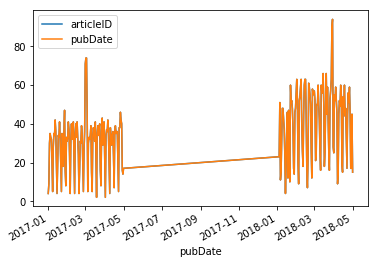

,articleID,pubDate
pubDate,,
2017-01-01,4,4
2017-01-02,9,9
2017-01-03,30,30
2017-01-04,35,35
2017-01-05,33,33
2018-01-04,23,23
2018-01-05,51,51
2018-01-06,11,11
2018-01-07,15,15


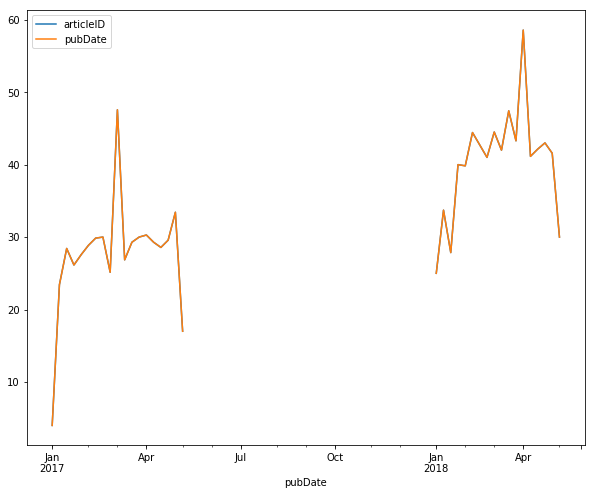

pubDate
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-12-31       AxesSubplot(0.125,0.2;0.775x0.68)
Freq: A-DEC, dtype: object

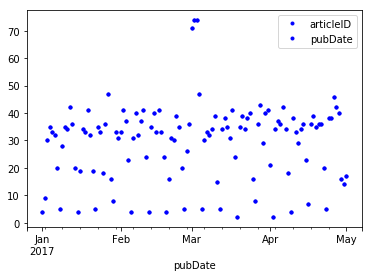

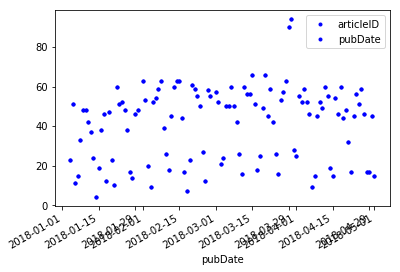

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

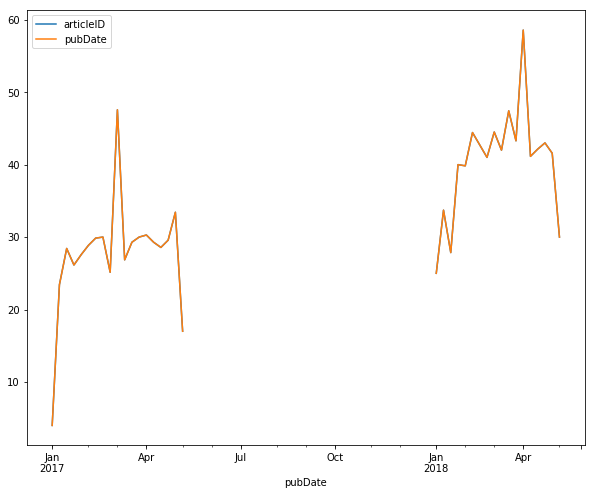

pubDate
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-12-31       AxesSubplot(0.125,0.2;0.775x0.68)
Freq: A-DEC, dtype: object

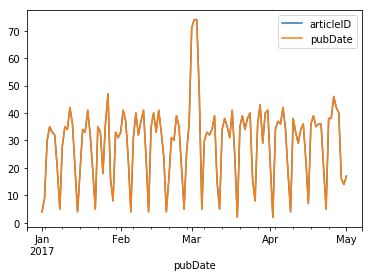

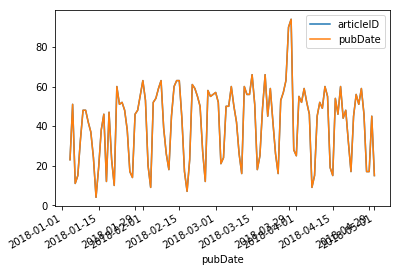

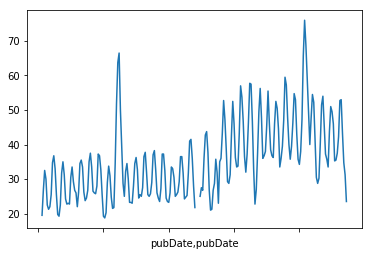

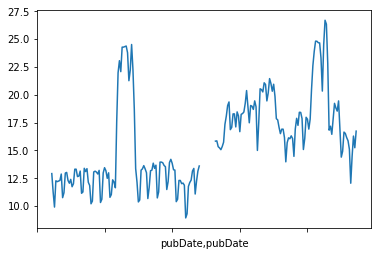

<Figure size 864x432 with 0 Axes>

,articleID,pubDate
pubDate,,
2017-01-01,4,4
2017-01-02,9,9
2017-01-03,30,30
2017-01-04,35,35
2017-01-05,33,33
2018-01-04,23,23
2018-01-05,51,51
2018-01-06,11,11
2018-01-07,15,15


Results of Dickey-Fuller Test:


TypeError: descriptor '__sub__' requires a 'datetime.datetime' object but received a 'int'

NameError: name 'dftest' is not defined

In [512]:
# Import adfuller
# from statsmodels.tsa.stattools import adfuller

In [511]:
# # Define check_stationarity function
# def stationarity_check(TS):  
#     # Calculate rolling statistics
#     rolmean = TS.rolling(window = 8, center = False).mean()
#     rolstd = TS.rolling(window = 8, center = False).std()
    
#     # Perform the Dickey Fuller Test
#     dftest = adfuller(TS['articleID'])
    
#     #Plot rolling statistics:
#     fig = plt.figure(figsize=(12,6))
#     orig = plt.plot(TS, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     # Print Dickey-Fuller test results
#     print ('Results of Dickey-Fuller Test:')

#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)
    
#     return None

In [510]:
# stationarity_check(week_mean)

In [509]:
# rolmean = np.log(week_mean).rolling(window = 7)

In [508]:
# plt.plot(rolmean)

In [506]:
# import seasonal_decompose
# from statsmodels.tsa.seasonal import seasonal_decompose

In [507]:
#decompose the weekly plot
# decomposition = seasonal_decompose(np.log(week_mean))
##delete if can't fill missing values

In [ ]:
#perform dickey fuller test on stationarity

,commentID,createDate
date,,
1970-01-01 00:00:01.483314066,1,1
1970-01-01 00:00:01.483315020,1,1
1970-01-01 00:00:01.483318256,1,1
1970-01-01 00:00:01.483319105,1,1
1970-01-01 00:00:01.483319616,1,1


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1730019 entries, 1970-01-01 00:00:01.483314066 to 1970-01-01 00:00:01.525233032
Data columns (total 2 columns):
commentID     int64
createDate    int64
dtypes: int64(2)
memory usage: 39.6 MB


In [462]:
category_group = articles_time[['newDesk','pubDate']].groupby(['pubDate','newDesk'])['newDesk'].count()
# df_category.head()
category_group.head(15)

pubDate     newDesk   
2017-01-01  Foreign       1
            Games         1
            National      1
            OpEd          1
2017-01-02  Culture       1
            Editorial     1
            Foreign       1
            Metro         1
            OpEd          1
            Science       1
            Sports        2
            Upshot        1
2017-01-03  BookReview    1
            Business      1
            Dining        4
Name: newDesk, dtype: int64

In [475]:
# category_group.plot()
#delete

In [474]:
# category_group_year = df_category.resample('W')
#delete

In [473]:
# category_group_year.plot()
#delete

TypeError: Empty 'DataFrame': no numeric data to plot

date
1970-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: A-DEC, dtype: object

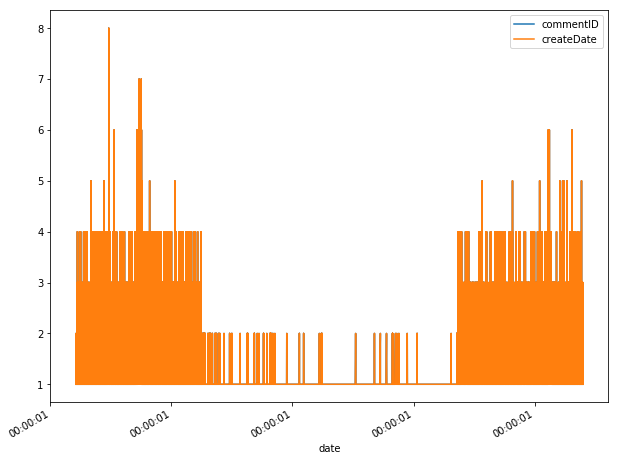

In [9]:
#remove trends and white noise

In [10]:
#create model

In [11]:
#plot

In [ ]:
#perform hypothesis test

In [1]:
#create function for random sample
def get_sample(data, n=30):
    sample = []
    while len(sample) != n:
        rand = np.random.choice(data)
        sample.append(rand)
    return sample

In [2]:
#function to calculate sample mean
def get_sample_mean(sample):
    return np.mean(sample)

In [3]:
#create sampling distribution function
def create_sample_distribution(data, dist_size=1000, n=30):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = get_sample(data, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
    
    return sample_dist

In [ ]:
#create two groups
full_orders_dist = create_sample_distribution(full['Orders'])
disc_orders_dist = create_sample_distribution(disc['Orders'])

In [ ]:
#plot the two groups
sns.distplot(full_orders_dist)
sns.distplot(disc_orders_dist)